In [33]:
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [34]:
df = pd.read_parquet("https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet")
data2 = pd.read_parquet("https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet")

# HomeWork 1 

# -------------------------------------------

# Home work 2

In [35]:
df["duration"] = pd.to_datetime(df.tpep_dropoff_datetime) - pd.to_datetime(df.tpep_pickup_datetime)

In [36]:
df["duration"] = df.duration.apply(lambda td: td.total_seconds()/60)

In [37]:
df["duration"].describe()

count   3066766.000000000000
mean         15.668995167330
std          42.594351241955
min         -29.200000000000
25%           7.116666666667
50%          11.516666666667
75%          18.300000000000
max       10029.183333333332
Name: duration, dtype: float64

In [38]:
pd.options.display.float_format = '{:.12f}'.format

In [39]:
df["duration"].describe()

count   3066766.000000000000
mean         15.668995167330
std          42.594351241955
min         -29.200000000000
25%           7.116666666667
50%          11.516666666667
75%          18.300000000000
max       10029.183333333332
Name: duration, dtype: float64

## ------------------------------------------------------------

# homework 3

In [40]:
filtered = df[df.duration >= 1]

In [41]:
filtered_furth =  filtered[filtered.duration <= 60]

In [42]:
Questions= "what fraction is left"

In [43]:
df.count()

VendorID                 3066766
tpep_pickup_datetime     3066766
tpep_dropoff_datetime    3066766
passenger_count          2995023
trip_distance            3066766
RatecodeID               2995023
store_and_fwd_flag       2995023
PULocationID             3066766
DOLocationID             3066766
payment_type             3066766
fare_amount              3066766
extra                    3066766
mta_tax                  3066766
tip_amount               3066766
tolls_amount             3066766
improvement_surcharge    3066766
total_amount             3066766
congestion_surcharge     2995023
airport_fee              2995023
duration                 3066766
dtype: int64

NameError: name 'fraction_percen' is not defined

# ---------------------------------

# homework 4

In [44]:
features = ["PULocationID", "DOLocationID"]

In [45]:
df = filtered_furth

In [46]:
filtered_furth[features] = filtered_furth[features].astype(str)

/tmp/ipykernel_65747/4221219245.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_furth[features] = filtered_furth[features].astype(str)


In [47]:
filtered_furth[features].dtypes

PULocationID    object
DOLocationID    object
dtype: object

In [48]:
dv = DictVectorizer()

In [49]:
train_dict = filtered_furth[features].to_dict(orient= 'records')

In [50]:
x_train = dv.fit_transform(train_dict)

In [58]:
y_train = filtered_furth["duration"].values

# ------------------------------
# homework 5

In [59]:
lr = LinearRegression()

In [60]:
lr.fit(x_train, y_train)

LinearRegression()

In [61]:
y_pred = lr.predict(x_train)

(60.0, 62.0, 60.0, 62.0)

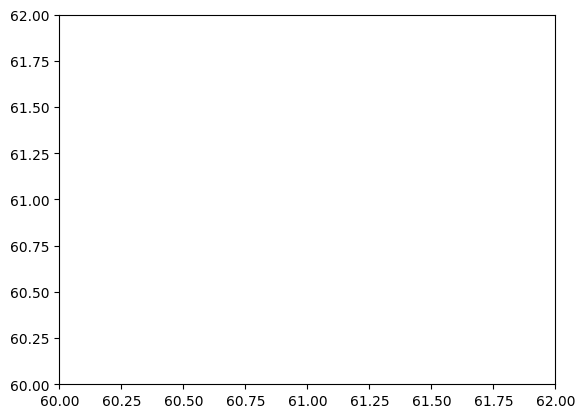

In [62]:
plt.scatter(y_train, y_pred)
plt.axis([60,62,60,62])

In [65]:
score = mean_squared_error(y_train, y_pred,squared = False)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [66]:
score

7.649261932106969